In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df=pd.read_csv('IMDBMovieData.csv')
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


### You are a studio that wants to create the best drama every! What is the current best drama, and what can we learn from it?

In [13]:
best_current_drama=df[(df['Metascore']==df['Metascore'].max()) & (str(df['Genre']).find('Drama')!=-1)]
best_current_drama

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Audience_Pop
656,657,Boyhood,Drama,"The life of Mason, from early childhood to his...",Richard Linklater,"Ellar Coltrane, Patricia Arquette, Ethan Hawke...",2014,165,7.9,286722,25.36,100.0,727.126992


### Lets hire the director, Richard Linklater, for this project. Who should our leading actor be? Someone with a long carreer of highly rated movies.

In [4]:
actor_dict={}
actorspro=df["Actors"].values.tolist()
actors=[]
for x in actorspro:
    bruh=x.split(', ')
    for y in bruh:
        actors.append(y)
counter = 0
best_actor = actors[0]       
for x in actors: 
    freq=actors.count(x) 
    if(freq> counter): 
        counter = freq 
        best_actor = x
best_actor

'Mark Wahlberg'

### How much money should we expect to make? Some combination of genre, runtime, and rating. Assume a above 95 metascore

In [5]:
avg_rev_drama=df[df['Genre']=='Drama']['Revenue (Millions)'].mean()
avg_rev_runtime=df[(df['Runtime (Minutes)']>150)&(df['Runtime (Minutes)']<180)]['Revenue (Millions)'].mean()
avg_rev_rating=df[df['Metascore']>95]['Revenue (Millions)'].mean()
expected_rev= (avg_rev_drama+avg_rev_runtime+avg_rev_rating)/3
expected_rev

92.38294418842804

### Not too good. Maybe we would do better in awards season. Lets get a supporting cast for Mark.

In [6]:
actor_dict={}
actorspro=df["Actors"].values.tolist()
actors=[]
for x in actorspro:
    bruh=x.split(', ')
    for y in bruh:
        actors.append(y)
counter = 0
count_1=0
count_2=0
best_actor = actors[0]  
support_1=actors[1]
support_2=actors[2]
for x in actors: 
    freq=actors.count(x) 
    if(freq> counter): 
        counter = freq 
        best_actor = x
    elif(freq<counter and freq>count_1):
        count_1=freq
        support_1=x
    elif(freq<count_1 and freq>count_2):
        count_2=freq
        support_2=x
print(support_1 +'\n'+ support_2)

Christian Bale
Tom Hardy


### We have put in all our work, lets let the writing staff take it over from here.... They are done. Lets see how the movie did

In [7]:
description='Have you ever heared the tragety of Darth Plageuis the Wise? I thought not.'
df2=pd.DataFrame({'Rank':[1001],'Title':['Dramatic Movie'], 'Genre':['Drama, Thriller'], 'Description':[description], 'Director':['Richard Linklater'],'Actors':[(best_actor+', '+support_1+', '+support_2)],'Year' :[2020],'Runtime (Minutes)': [155], 'Rating':[8.9], 'Votes':[286722], 'Revenue (Millions)':[expected_rev],'Metascore': [97]})
df.append(df2)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.130000,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.460000,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.120000,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.320000,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.020000,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.540000,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.010000,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0
999,1000,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.640000,11.0


### Come up with an audience popularity score

In [8]:
def pop_score(s):
    return s/1000

In [9]:
df['Audience_Pop']=df['Votes']*df['Revenue (Millions)']/10000
df

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Audience_Pop
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,25220.406162
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,6143.679720
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,2176.854072
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,1636.652440
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,12796.914954
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0,NaN
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0,128.308608
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0,410.124899
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0,NaN


### --------------------------------------------------------------------------------------------
### What year had the most movie

Text(0, 0.5, 'Amount of movies released')

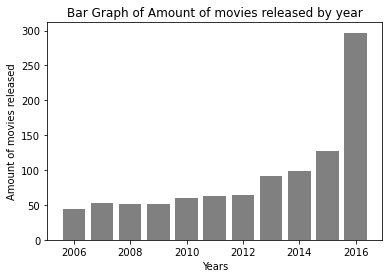

In [10]:
x=df['Year'].value_counts().keys()
y=df['Year'].value_counts()
plt.bar(x, y, color = 'gray')

plt.title('Bar Graph of Amount of movies released by year')
plt.xlabel('Years')
plt.ylabel('Amount of movies released')

### What year had the highest grossing movies

Text(0, 0.5, 'Avg rev per movie')

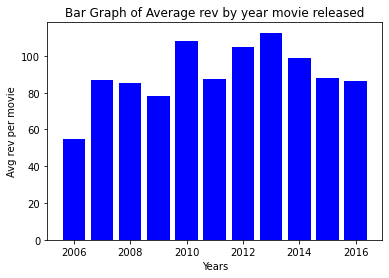

In [11]:
y= df.groupby('Year')['Revenue (Millions)'].mean()
plt.bar(x, y, color = 'blue')

plt.title('Bar Graph of Average rev by year movie released')
plt.xlabel('Years')
plt.ylabel('Avg rev per movie')